# 树

Given a binary tree, find its minimum depth.

The minimum depth is the number of nodes along the shortest path from the root node down to the
nearest leaf node.

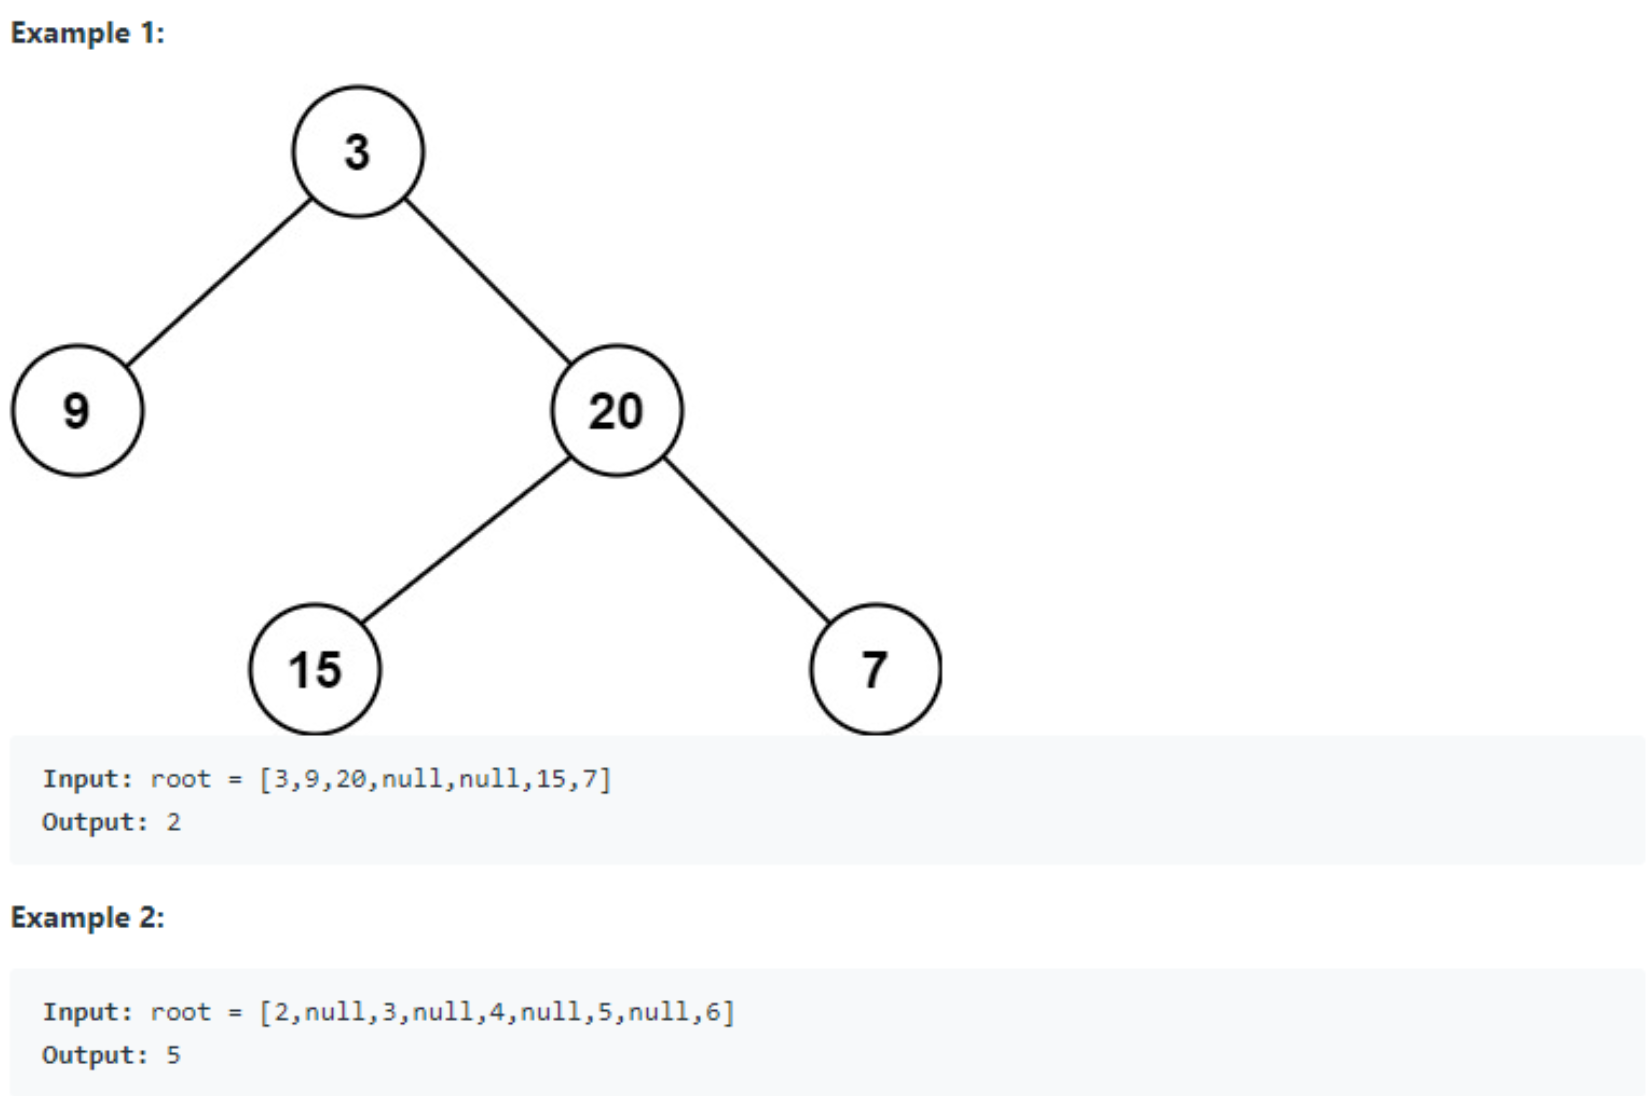

In [1]:
from IPython.display import Image
Image(filename='/Users/ruizhihao/Desktop/TRAINing/tree1.png')


In [ ]:
#深度优先DFS
class solution:
    def minDepth(self,root):
        if not root:
            return 0
        leftDepth = self.minDepth(root.left)
        rightDepth = self.minDepth(root.right)
        if not root.left or not root.right:
            return leftDepth+rightDepth+1
        
        return min(leftDepth, rightDepth)+1
    #到最后才知道是1，之后调用函数+1之后是2，一步一步到最顶端
        

In [6]:
#广度优先BFS
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution1:
    def minDepth1(self, root):
        if not root:
            return 0
        else:
            queue = [(root, 1)]

        while queue:#只要还有元素，while就会继续循环
            node, depth = queue.pop(0)#这个是队列，先进先出（FIFO）每次都是从queue的头部取出一个元素
            if node:
                children = [node.left, node.right]
                if not any(children):
                    return depth
                for child in children:
                    if child:
                        queue.append((child, depth + 1))#如果有就加1并且把数据存在queue的尾部


In [7]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


In [8]:
root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)


In [9]:
solution = Solution1()
print(solution.minDepth1(root))


2


Question 2

Given the root of a binary tree, return its maximum depth. A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

In [ ]:
class TreeNode:
    #深度优先
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root: # If the root is None, return 0
            return 0
        else:
            # Find the maximum depth of the left and right children and add 1 to it (for the current node)
            left_height = self.maxDepth(root.left)
            right_height = self.maxDepth(root.right)
            return max(left_height, right_height) + 1


In [ ]:
from collections import deque
#广度优先
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if not root:
            return 0

        queue = deque([(root, 1)]) # We start with the root at level 1
        max_depth = 0

        while queue:
            node, depth = queue.popleft() # Dequeue a node from the front of the queue
            max_depth = max(max_depth, depth) # Keep track of the maximum depth

            if node.left:
                queue.append((node.left, depth + 1)) # Enqueue left child
            if node.right:
                queue.append((node.right, depth + 1)) # Enqueue right child

        return max_depth
#注意没有return会默认为none

In [19]:
#question2 自我练习
class Solution2:
    def maxDepth1(self, root):
        maxDepth = []
        if not root:
            return 0
        else:
            queue = [(root, 1)]

        while queue:#只要还有元素，while就会继续循环
            node, depth = queue.pop(0)#这个是队列，先进先出（FIFO）每次都是从queue的头部取出一个元素
            if node:
                children = [node.left, node.right]
                if not any(children):
                    maxDepth.append((node,depth))
                for child in children:
                    if child:
                        queue.append((child, depth + 1))#如果有就加1并且把数据存在queue的尾部
        max_tuple = max(maxDepth, key=lambda item: item[1])
        return max_tuple[1]




In [20]:
solution = Solution2()

print(solution.maxDepth1(root))


3


In [12]:
queue = (0,1)

In [13]:
queue[1]

1

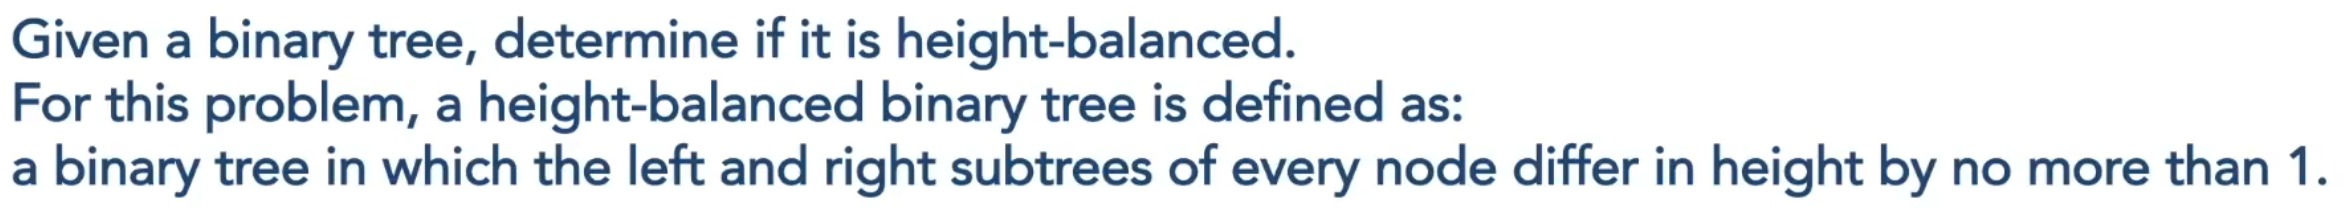

In [21]:

Image(filename='/Users/ruizhihao/Desktop/TRAINing/tree31.png')


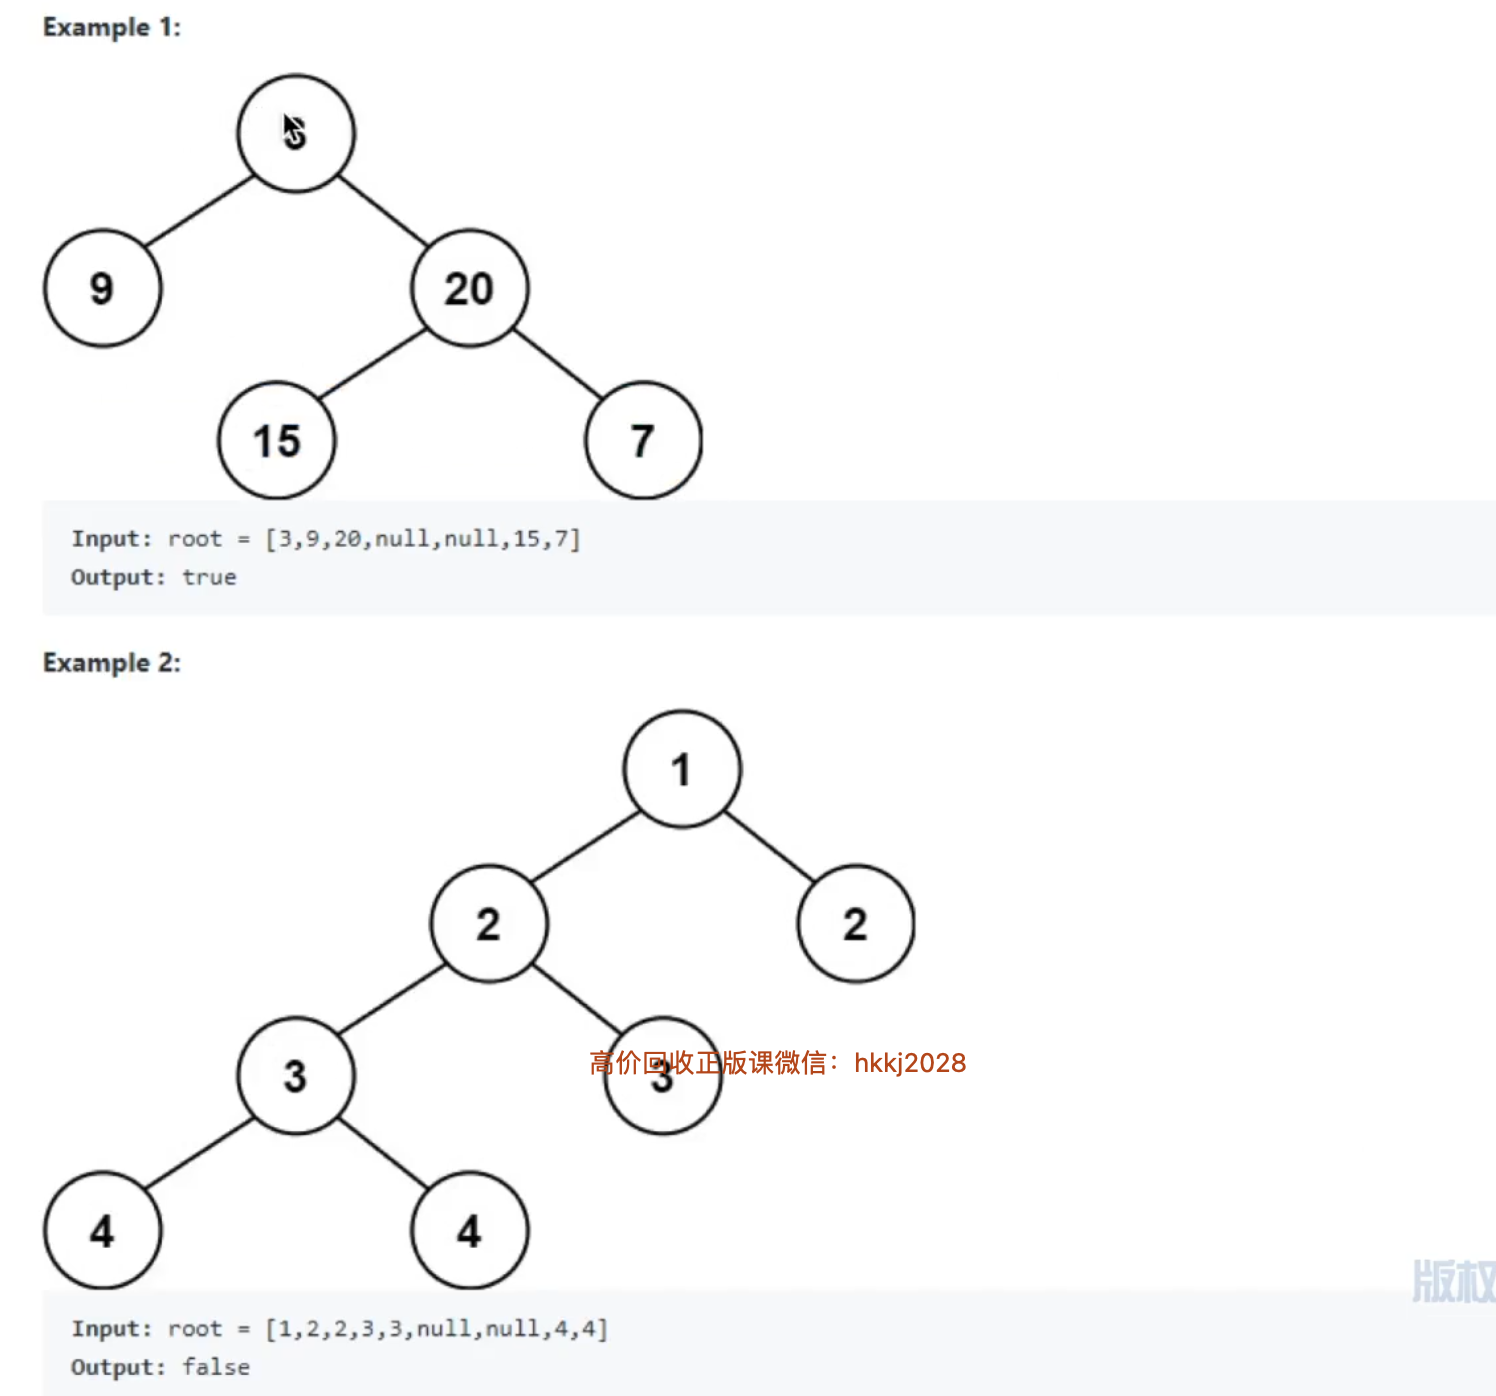

In [23]:
Image(filename='/Users/ruizhihao/Desktop/TRAINing/tree32.png')


In [30]:
#自我练习

#question2 自我练习转化到最小与最大不超过1
class Solution2:
    def maxDepth1(self, root):
        maxDepth = []
        if not root:
            return 0
        else:
            queue = [(root, 1)]

        while queue:#只要还有元素，while就会继续循环
            node, depth = queue.pop(0)#这个是队列，先进先出（FIFO）每次都是从queue的头部取出一个元素
            if node:
                children = [node.left, node.right]
                if not any(children):
                    maxDepth.append((node,depth))
                for child in children:
                    if child:
                        queue.append((child, depth + 1))#如果有就加1并且把数据存在queue的尾部
        max_tuple = max(maxDepth, key=lambda item: item[1])
        min_tuple = min(maxDepth, key = lambda item: item[1])
        Diff = max_tuple[1] - min_tuple[1]
        if Diff >1:
            return False
        else: 
            return True
            
        

#错误方法

#首先费时间，因为检查所有树，其次这个问题只需要检查每一个分支


In [31]:
root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)


In [32]:
solution = Solution2()

print(solution.maxDepth1(root))


True


In [33]:
#第二个例子
root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)
root.right.right.left = TreeNode(151)
root.right.right.right = TreeNode(71)


In [34]:
solution = Solution2()

print(solution.maxDepth1(root))


False


In [ ]:
#正确解法


class Solution():
    def height(self, root):
        if not root:
            return 0
        return 1+ max(self.height(root.left), self.height(root.right))
    def isBalanced():
        if not root:
            return True
        return abs(self.height(root.left) - self.height(root.right))<2 and isBalanced(root.left) and isBalanced(root.right)
    

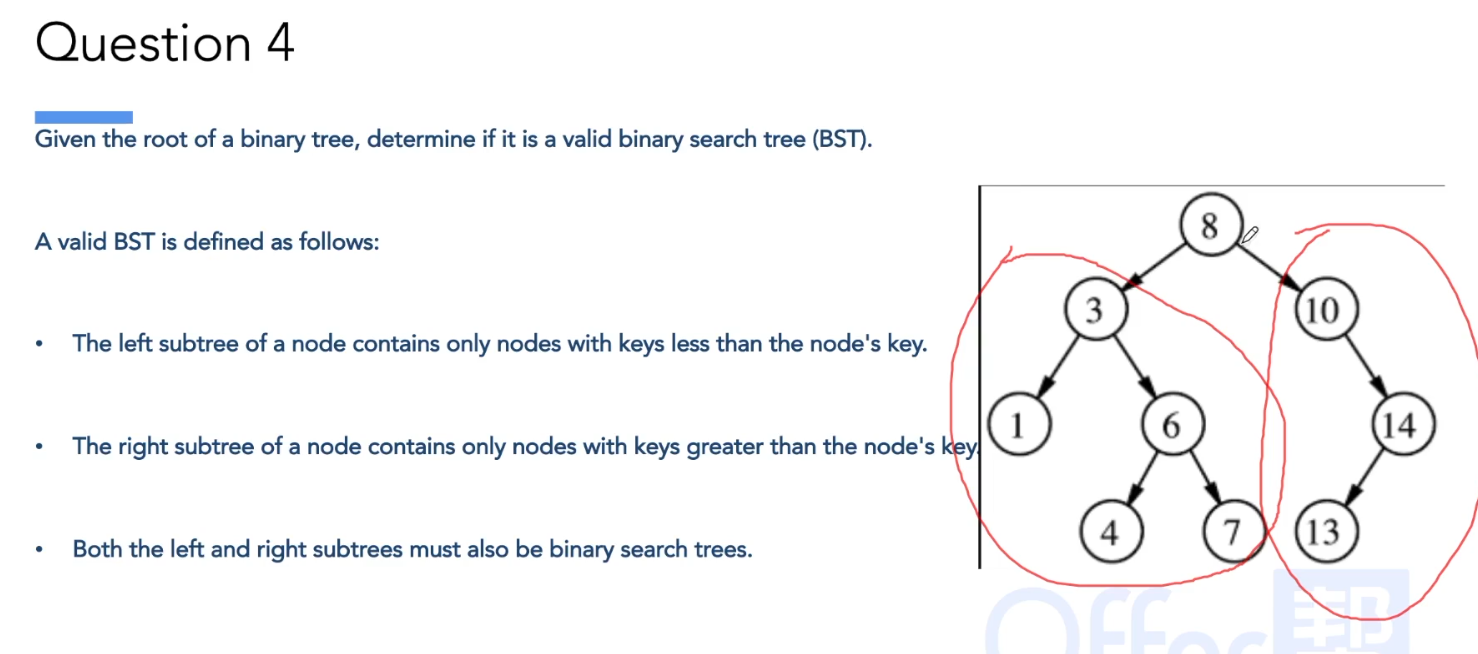

In [36]:
Image(filename='/Users/ruizhihao/Desktop/TRAINing/tree4.png')


In [ ]:
class Solution:
    def valid(self, root, lowerbound, upperbound):
        if not root:
            return true
        if root.val <= lowerbound and root.val >= upperbound:
            return false
        return self.valid(root.left, lowerbound, root.val) and self.valid(root.right, root.val, upperbound)
            
    
    
    
    def isValidBST(self, root):
        if not root:
            return True
        return self.valid(root, -float('inf'),float('inf'))